In [1]:
# used for manipulating directory paths
import os

# For N-dimensional array manipulation
import numpy as np

# Plotting library
import matplotlib.pyplot as plt

# For data analysis and data structures in DataFrames 
import pandas as pd

import joblib

In [2]:
data = 'database/Loan_default.csv'
df = pd.read_csv(data)

print(df.head())

       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other   
1      Full-time    

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [4]:
dfShape = df.shape
print("Data frame shape: \n", dfShape )
df.isnull().sum()

Data frame shape: 
 (255347, 18)


LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [5]:
print("Duplicate rows:")
print(df.duplicated().sum())
df.describe()

Duplicate rows:
0


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


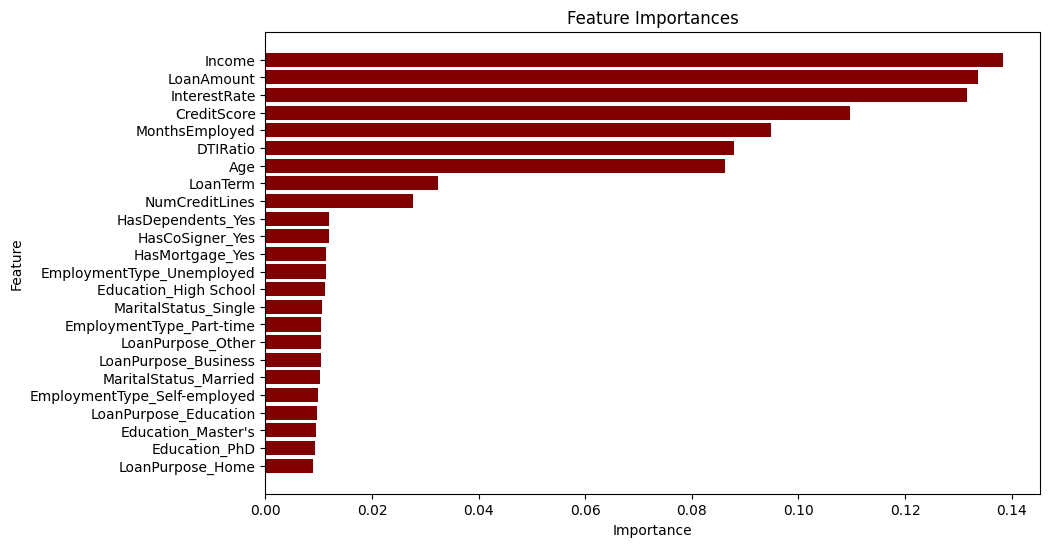

In [6]:
from sklearn.ensemble import RandomForestRegressor

df = df.copy()
X = df.drop(['Default', 'LoanID'], axis=1)
y = df['Default']

X_encoded = pd.get_dummies(X, columns=X.select_dtypes(include=['object']).columns, drop_first=True)

rf_regressor = RandomForestRegressor(n_estimators=10, random_state=42)
rf_regressor.fit(X_encoded, y)
feature_importances = rf_regressor.feature_importances_

importance_df = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='maroon')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  
plt.show()

In [7]:
#drop features that have less than 0.03 importance
df= df.drop(['LoanID', 'InterestRate', 'NumCreditLines', 'MaritalStatus','EmploymentType', 'LoanPurpose','Education', 'HasMortgage' ,'HasDependents' ,'HasCoSigner', 'HasMortgage' ],  axis=1)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

In [9]:
X = df.drop("Default", axis=1)
Y = df["Default"]

In [10]:
print(X)

        Age  Income  LoanAmount  CreditScore  MonthsEmployed  LoanTerm  \
0        56   85994       50587          520              80        36   
1        69   50432      124440          458              15        60   
2        46   84208      129188          451              26        24   
3        32   31713       44799          743               0        24   
4        60   20437        9139          633               8        48   
...     ...     ...         ...          ...             ...       ...   
255342   19   37979      210682          541             109        12   
255343   32   51953      189899          511              14        24   
255344   56   84820      208294          597              70        60   
255345   42   85109       60575          809              40        48   
255346   62   22418       18481          636             113        12   

        DTIRatio  
0           0.44  
1           0.68  
2           0.31  
3           0.23  
4           0.73

In [11]:
Y.value_counts(normalize=True)

Default
0    0.883872
1    0.116128
Name: proportion, dtype: float64

In [12]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X, Y)

In [13]:
Y_resampled.value_counts(normalize=True)

Default
0    0.5
1    0.5
Name: proportion, dtype: float64

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

(406250, 7)
(361111, 7)
(315972, 7)
(270833, 7)
(225694, 7)
(180556, 7)
(135417, 7)
(90278, 7)
(45139, 7)
classification report: 
              precision    recall  f1-score   support

           0       0.84      0.81      0.83     22551
           1       0.82      0.85      0.83     22588

    accuracy                           0.83     45139
   macro avg       0.83      0.83      0.83     45139
weighted avg       0.83      0.83      0.83     45139

Confusion matrix : 
[[18265  4286]
 [ 3414 19174]]


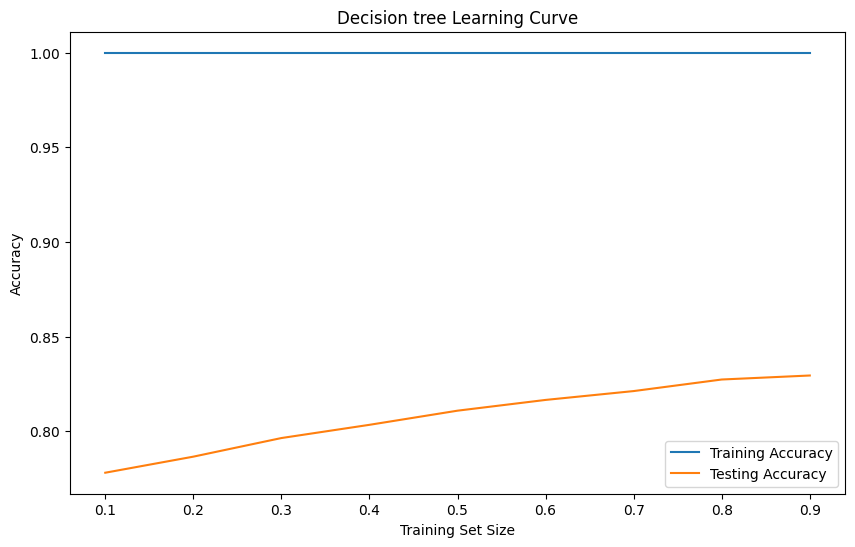

In [23]:
decTree_modelv1 = DecisionTreeClassifier(criterion="gini",random_state=420)

training_sizes = np.linspace(0.1, 0.9, 9)
train_accuracies = []
test_accuracies = []

for size in training_sizes:

    X_train, X_test, Y_train, Y_test= train_test_split(X_resampled, Y_resampled, test_size=1-size, random_state=42)
   
    
    decTree_modelv1.fit(X_train, Y_train)
    print(X_test.shape)

    train_preds = decTree_modelv1.predict(X_train)
    test_preds = decTree_modelv1.predict(X_test)

    train_accuracies.append(accuracy_score(Y_train, train_preds))
    test_accuracies.append(accuracy_score(Y_test, test_preds))
    
print("classification report: ")
print(classification_report(Y_test,test_preds))
print("Confusion matrix : ")
print(confusion_matrix(Y_test,test_preds))

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(training_sizes, train_accuracies, label='Training Accuracy')
plt.plot(training_sizes, test_accuracies, label='Testing Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Decision tree Learning Curve')
plt.legend()
plt.show()

In [29]:
new_data = [[26, 50000, 6000, 720, 8, 6, 0.24]] 
prediction = decTree_modelv1.predict(new_data)
print(f'Predicted Class for New Data: {prediction}')

new_data = [[6, 50, 6000000, 40, 8, 6, 0.94]] 
prediction = decTree_modelv1.predict(new_data)
print(f'Predicted Class for New Data: {prediction}')

Predicted Class for New Data: [0]
Predicted Class for New Data: [0]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
classification report: 
              precision    reca

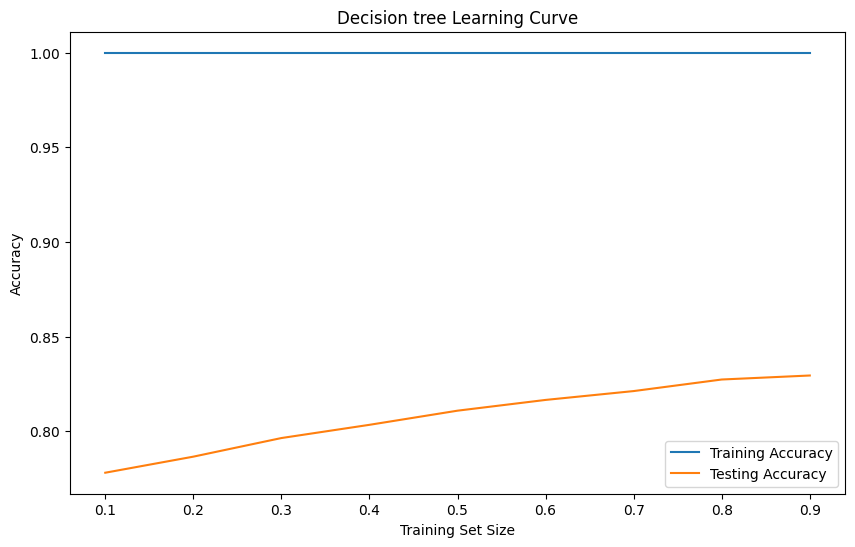

In [27]:
from sklearn.model_selection import GridSearchCV
#Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

param_grid = {
    'criterion': ['gini'],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

decTree_modelv2 = DecisionTreeClassifier(random_state=420)

training_sizes = np.linspace(0.1, 0.9, 9)
train_accuracies = []
test_accuracies = [] 

for size in training_sizes:
   
    X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=1-size, random_state=42)

    grid_search = GridSearchCV(estimator=decTree_modelv2, param_grid=param_grid, cv=10, scoring='accuracy')

    grid_search.fit(X_train, Y_train)
    best_params = grid_search.best_params_
    print("Best Parameters:", best_params)

    decTree_modelv2 = DecisionTreeClassifier(random_state=420, **best_params)
    
    decTree_modelv2.fit(X_train, Y_train)

    train_preds = decTree_modelv2.predict(X_train)
    test_preds = decTree_modelv2.predict(X_test)

    train_accuracies.append(accuracy_score(Y_train, train_preds))
    test_accuracies.append(accuracy_score(Y_test, test_preds))
    
print("classification report: ")
print(classification_report(Y_test, test_preds))
print("Confusion matrix : ")
print(confusion_matrix(Y_test, test_preds))

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(training_sizes, train_accuracies, label='Training Accuracy')
plt.plot(training_sizes, test_accuracies, label='Testing Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Decision tree Learning Curve')
plt.legend()
plt.show()

In [28]:
new_data = [[26, 50000, 6000, 720, 8, 6, 0.24]] 
prediction =  decTree_modelv2.predict(new_data)
print(f'Predicted Class for New Data: {prediction}')

new_data = [[16, 500, 6000, 420, 8, 6, 0.94]] 
prediction =  decTree_modelv2.predict(new_data)
print(f'Predicted Class for New Data: {prediction}')

Predicted Class for New Data: [0]
Predicted Class for New Data: [1]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Best Parameters: {'ccp_alpha': 0.0001, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
classification report: 
Best Parameters: {'ccp_alpha': 0.0001, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
classification report: 
Best Parameters: {'ccp_alpha': 0.0001, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
classification report: 
Best Parameters: {'ccp_alpha': 0.0001, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
classification report: 
Best Parameters: {'ccp_alpha': 0.0001, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
classification report: 
Best Parameters: {'ccp_alpha': 0.0001, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
classification report: 
Best Parameters: {'ccp_alpha': 0.0001, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1

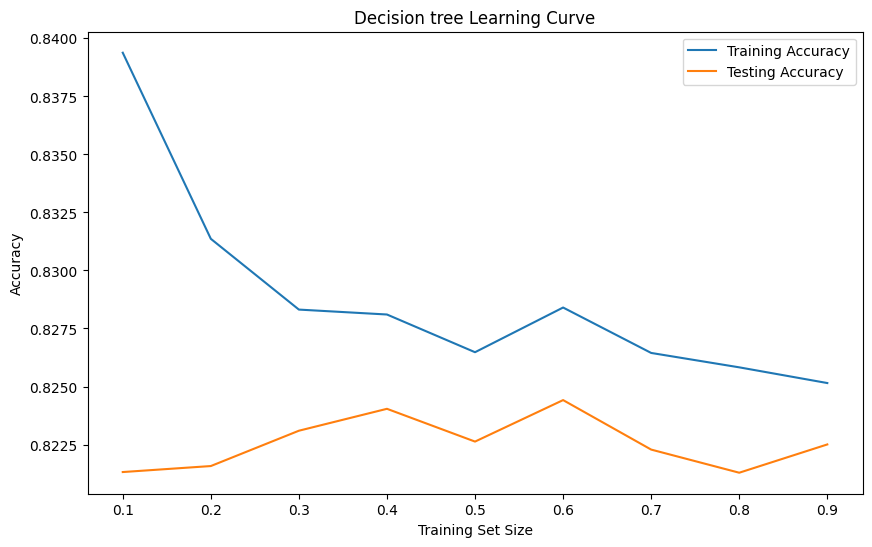

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
#Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
#0.0001 [[21750   801]
# [ 7211 15377]]

param_grid = {
    'criterion': ['gini'],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'ccp_alpha' : [0.0001]
}

decTree_modelv3 = DecisionTreeClassifier(random_state=420)

training_sizes = np.linspace(0.1, 0.9, 9)
train_accuracies = []
test_accuracies = [] 

for size in training_sizes:

    X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=1-size, random_state=42)
   
    grid_search = GridSearchCV(estimator=decTree_modelv2, param_grid=param_grid, cv=10, scoring='accuracy')

    grid_search.fit(X_train, Y_train)

    best_params = grid_search.best_params_
    print("Best Parameters:", best_params)

    decTree_modelv3 = DecisionTreeClassifier(random_state=420, **best_params)
    decTree_modelv3.fit(X_train, Y_train)

    train_preds = decTree_modelv3.predict(X_train)
    test_preds = decTree_modelv3.predict(X_test)

    train_accuracies.append(accuracy_score(Y_train, train_preds))
    test_accuracies.append(accuracy_score(Y_test, test_preds))
    
print("classification report: ")
print(classification_report(Y_test, test_preds))
print("Confusion matrix : ")
print(confusion_matrix(Y_test, test_preds))

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(training_sizes, train_accuracies, label='Training Accuracy')
plt.plot(training_sizes, test_accuracies, label='Testing Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Decision tree Learning Curve')
plt.legend()
plt.show()

In [31]:
new_data = [[26, 50000, 6000, 720, 8, 6, 0.24]] 
prediction = decTree_modelv3.predict(new_data)
print(f'Predicted Class for New Data: {prediction}')

new_data = [[16, 770, 600000, 20, 8, 6, 0.94]] 
prediction = decTree_modelv3.predict(new_data)
print(f'Predicted Class for New Data: {prediction}')

Predicted Class for New Data: [0]
Predicted Class for New Data: [1]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Best Parameters: {'ccp_alpha': 0.0001, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Parameters: {'ccp_alpha': 0.0001, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Parameters: {'ccp_alpha': 0.0001, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Parameters: {'ccp_alpha': 0.0001, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Parameters: {'ccp_alpha': 0.0001, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Parameters: {'ccp_alpha': 0.0001, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Parameters: {'ccp_alpha': 0.0001, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Parameters: {'ccp_alpha': 0.0001, 'criterion': 'entropy', 'max_depth': None, 'min_samples_le

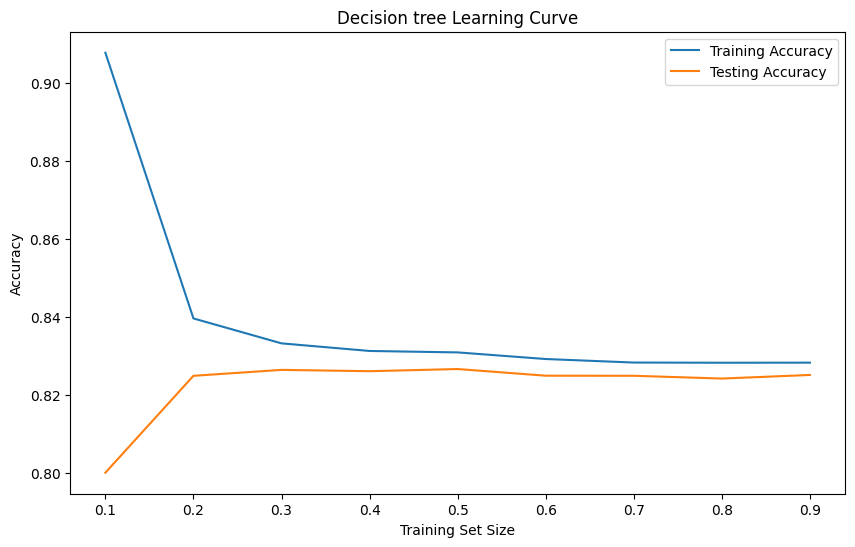

In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['entropy'],
    'max_depth': [None],
    'min_samples_split': [5],
    'min_samples_leaf': [2],
    'ccp_alpha' : [0.0001]
}

decTree_modelv4 = DecisionTreeClassifier(random_state=420)

training_sizes = np.linspace(0.1, 0.9, 9)
train_accuracies = []
test_accuracies = [] 

for size in training_sizes:

    X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=1-size, random_state=42)
   
    grid_search = GridSearchCV(estimator=decTree_modelv2, param_grid=param_grid, cv=10, scoring='accuracy')

    grid_search.fit(X_train, Y_train)

    best_params = grid_search.best_params_
    print("Best Parameters:", best_params)

    decTree_modelv4 = DecisionTreeClassifier(random_state=420, **best_params)
    decTree_modelv4.fit(X_train, Y_train)

    train_preds = decTree_modelv4.predict(X_train)
    test_preds = decTree_modelv4.predict(X_test)

    train_accuracies.append(accuracy_score(Y_train, train_preds))
    test_accuracies.append(accuracy_score(Y_test, test_preds))

print("classification report: ")
print(classification_report(Y_test, test_preds))
print("Confusion matrix : ")
print(confusion_matrix(Y_test, test_preds))

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(training_sizes, train_accuracies, label='Training Accuracy')
plt.plot(training_sizes, test_accuracies, label='Testing Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Decision tree Learning Curve')
plt.legend()
plt.show()

In [43]:
new_data = [[26, 50000, 6000, 720, 8, 6, 0.24]] 
prediction = decTree_modelv4.predict(new_data)
print(f'Predicted Class for New Data: {prediction}')

new_data = [[16, 770, 600000, 20, 8, 6, 0.94]] 
prediction = decTree_modelv4.predict(new_data)
print(f'Predicted Class for New Data: {prediction}')

Predicted Class for New Data: [0]
Predicted Class for New Data: [1]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Best Parameters: {'ccp_alpha': 1e-05, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5}
Best Parameters: {'ccp_alpha': 1e-05, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5}
Best Parameters: {'ccp_alpha': 1e-05, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5}
Best Parameters: {'ccp_alpha': 1e-05, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5}
Best Parameters: {'ccp_alpha': 1e-05, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5}
Best Parameters: {'ccp_alpha': 1e-05, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5}
Best Parameters: {'ccp_alpha': 1e-05, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5}
Best Parameters: {'ccp_alpha': 1e-05, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_spl

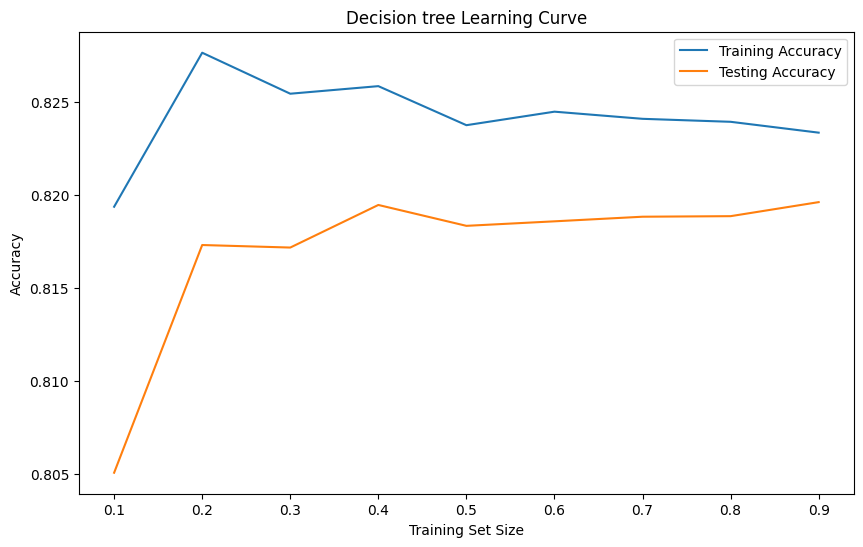

In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['entropy'],
    'max_depth': [10],
    'min_samples_split': [5],
    'min_samples_leaf': [4],
    'ccp_alpha' : [0.00001]
}

decTree_modelv5 = DecisionTreeClassifier(random_state=420)

training_sizes = np.linspace(0.1, 0.9, 9)
train_accuracies = []
test_accuracies = [] 

for size in training_sizes:

    X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=1-size, random_state=42)
   
    grid_search = GridSearchCV(estimator=decTree_modelv2, param_grid=param_grid, cv=10, scoring='accuracy')

    grid_search.fit(X_train, Y_train)

    best_params = grid_search.best_params_
    print("Best Parameters:", best_params)

    decTree_modelv5 = DecisionTreeClassifier(random_state=420, **best_params)
    decTree_modelv5.fit(X_train, Y_train)

    train_preds = decTree_modelv5.predict(X_train)
    test_preds = decTree_modelv5.predict(X_test)

    train_accuracies.append(accuracy_score(Y_train, train_preds))
    test_accuracies.append(accuracy_score(Y_test, test_preds))

print("classification report: ")
print(classification_report(Y_test, test_preds))
print("Confusion matrix : ")
print(confusion_matrix(Y_test, test_preds))

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(training_sizes, train_accuracies, label='Training Accuracy')
plt.plot(training_sizes, test_accuracies, label='Testing Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Decision tree Learning Curve')
plt.legend()
plt.show()


In [45]:
new_data = [[26, 50000, 6000, 720, 8, 6, 0.24]] 
prediction = decTree_modelv5.predict(new_data)
print(f'Predicted Class for New Data: {prediction}')

new_data = [[16, 770, 600000, 20, 8, 6, 0.94]] 
prediction = decTree_modelv5.predict(new_data)
print(f'Predicted Class for New Data: {prediction}')

Predicted Class for New Data: [0]
Predicted Class for New Data: [1]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [50]:
# Save the trained model using joblib
joblib.dump(decTree_modelv1, 'newMLmodels/model_V1.joblib')

# Load the model back from the file
decisionTreeModel = joblib.load('newMLmodels/model_V1.joblib')

In [58]:
joblib.dump(decTree_modelv2, 'newMLmodels/model_V2.joblib')
decisionTreeModel2 = joblib.load('newMLmodels/model_V2.joblib')

In [57]:
joblib.dump(decTree_modelv3, 'newMLmodels/model_V3.joblib')
decisionTreeModel3 = joblib.load('newMLmodels/model_V3.joblib')

In [56]:
joblib.dump(decTree_modelv4, 'newMLmodels/model_V4.joblib')
decisionTreeModel4 = joblib.load('newMLmodels/model_V4.joblib')

In [55]:
joblib.dump(decTree_modelv5, 'newMLmodels/model_V5.joblib')
decisionTreeModel5 = joblib.load('newMLmodels/model_V5.joblib')